In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from torch import nn, optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import torch

df = pd.read_csv('UpdatedMatches.csv')

In [2]:
df['season'].replace({'2008/2009':2008, '2009/2010':2009, '2010/2011':2010, '2011/2012':2011, '2012/2013':2012, '2013/2014':2013, '2014/2015':2014, '2015/2016':2015 },inplace=True)

df["result"] = np.nan
for index, row in df.iterrows():
    if df.loc[index,'home_team_goal'] == df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 1
    if df.loc[index,'home_team_goal'] > df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 2
    if df.loc[index,'home_team_goal'] < df.loc[index,'away_team_goal']:
        df.loc[index,'result'] = 0

C:\Users\herath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result', ylabel='count'>

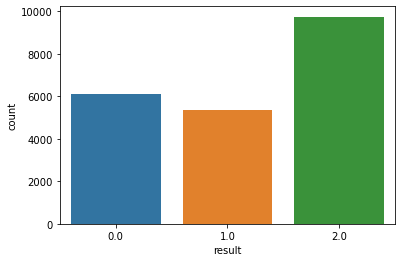

In [3]:
sns.countplot(df.result)

In [4]:
df.result.value_counts()/df.shape[0]

2.0    0.459098
0.0    0.288525
1.0    0.252377
Name: result, dtype: float64

In [5]:
home_player_data = []
away_player_data = []

In [6]:
from tqdm import tqdm

def playerfunction( df ):
    for index, row in tqdm(df.iterrows()):
        overall_rating_home_players = []
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_1'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_2'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_3'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_4'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_5'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_6'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_7'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_8'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_9'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_10'])
        overall_rating_home_players.append(df.loc[index,'overall_rating_home_player_11'])

        overall_rating_away_players = []
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_1'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_2'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_3'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_4'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_5'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_6'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_7'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_8'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_9'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_10'])
        overall_rating_away_players.append(df.loc[index,'overall_rating_away_player_11'])


        potential_home_players = []
        potential_home_players.append(df.loc[index,'potential_home_player_1'])
        potential_home_players.append(df.loc[index,'potential_home_player_2'])
        potential_home_players.append(df.loc[index,'potential_home_player_3'])
        potential_home_players.append(df.loc[index,'potential_home_player_4'])
        potential_home_players.append(df.loc[index,'potential_home_player_5'])
        potential_home_players.append(df.loc[index,'potential_home_player_6'])
        potential_home_players.append(df.loc[index,'potential_home_player_7'])
        potential_home_players.append(df.loc[index,'potential_home_player_8'])
        potential_home_players.append(df.loc[index,'potential_home_player_9'])
        potential_home_players.append(df.loc[index,'potential_home_player_10'])
        potential_home_players.append(df.loc[index,'potential_home_player_11'])

        potential_away_players = []
        potential_away_players.append(df.loc[index,'potential_away_player_1'])
        potential_away_players.append(df.loc[index,'potential_away_player_2'])
        potential_away_players.append(df.loc[index,'potential_away_player_3'])
        potential_away_players.append(df.loc[index,'potential_away_player_4'])
        potential_away_players.append(df.loc[index,'potential_away_player_5'])
        potential_away_players.append(df.loc[index,'potential_away_player_6'])
        potential_away_players.append(df.loc[index,'potential_away_player_7'])
        potential_away_players.append(df.loc[index,'potential_away_player_8'])
        potential_away_players.append(df.loc[index,'potential_away_player_9'])
        potential_away_players.append(df.loc[index,'potential_away_player_10'])
        potential_away_players.append(df.loc[index,'potential_away_player_11'])

        crossing_home_players = []
        crossing_home_players.append(df.loc[index,'crossing_home_player_1'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_2'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_3'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_4'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_5'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_6'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_7'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_8'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_9'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_10'])
        crossing_home_players.append(df.loc[index,'crossing_home_player_11'])

        crossing_away_players = []
        crossing_away_players.append(df.loc[index,'crossing_away_player_1'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_2'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_3'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_4'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_5'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_6'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_7'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_8'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_9'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_10'])
        crossing_away_players.append(df.loc[index,'crossing_away_player_11'])

        finishing_home_players = []
        finishing_home_players.append(df.loc[index,'finishing_home_player_1'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_2'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_3'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_4'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_5'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_6'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_7'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_8'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_9'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_10'])
        finishing_home_players.append(df.loc[index,'finishing_home_player_11'])

        finishing_away_players = []
        finishing_away_players.append(df.loc[index,'finishing_away_player_1'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_2'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_3'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_4'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_5'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_6'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_7'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_8'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_9'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_10'])
        finishing_away_players.append(df.loc[index,'finishing_away_player_11'])


        heading_accuracy_home_players = []
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_1'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_2'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_3'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_4'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_5'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_6'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_7'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_8'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_9'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_10'])
        heading_accuracy_home_players.append(df.loc[index,'heading_accuracy_home_player_11'])

        heading_accuracy_away_players = []
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_1'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_2'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_3'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_4'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_5'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_6'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_7'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_8'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_9'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_10'])
        heading_accuracy_away_players.append(df.loc[index,'heading_accuracy_away_player_11'])


        dribbling_home_players = []
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_1'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_2'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_3'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_4'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_5'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_6'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_7'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_8'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_9'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_10'])
        dribbling_home_players.append(df.loc[index,'dribbling_home_player_11'])

        dribbling_away_players = []
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_1'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_2'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_3'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_4'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_5'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_6'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_7'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_8'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_9'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_10'])
        dribbling_away_players.append(df.loc[index,'dribbling_away_player_11'])


        free_kick_accuracy_home_players = []
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_1'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_2'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_3'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_4'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_5'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_6'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_7'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_8'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_9'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_10'])
        free_kick_accuracy_home_players.append(df.loc[index,'free_kick_accuracy_home_player_11'])

        free_kick_accuracy_away_players = []
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_1'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_2'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_3'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_4'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_5'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_6'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_7'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_8'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_9'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_10'])
        free_kick_accuracy_away_players.append(df.loc[index,'free_kick_accuracy_away_player_11'])


        ball_control_home_players = []
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_1'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_2'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_3'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_4'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_5'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_6'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_7'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_8'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_9'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_10'])
        ball_control_home_players.append(df.loc[index,'ball_control_home_player_11'])


        ball_control_away_players = []
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_1'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_2'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_3'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_4'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_5'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_6'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_7'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_8'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_9'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_10'])
        ball_control_away_players.append(df.loc[index,'ball_control_away_player_11'])


        sprint_speed_home_players = []
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_1'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_2'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_3'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_4'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_5'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_6'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_7'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_8'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_9'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_10'])
        sprint_speed_home_players.append(df.loc[index,'sprint_speed_home_player_11'])


        sprint_speed_away_players = []
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_1'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_2'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_3'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_4'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_5'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_6'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_7'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_8'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_9'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_10'])
        sprint_speed_away_players.append(df.loc[index,'sprint_speed_away_player_11'])


        acceleration_home_players = []
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_1'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_2'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_3'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_4'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_5'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_6'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_7'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_8'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_9'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_10'])
        acceleration_home_players.append(df.loc[index,'acceleration_home_player_11'])


        acceleration_away_players = []
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_1'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_2'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_3'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_4'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_5'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_6'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_7'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_8'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_9'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_10'])
        acceleration_away_players.append(df.loc[index,'acceleration_away_player_11'])


        strength_home_players = []
        strength_home_players.append(df.loc[index,'strength_home_player_1'])
        strength_home_players.append(df.loc[index,'strength_home_player_2'])
        strength_home_players.append(df.loc[index,'strength_home_player_3'])
        strength_home_players.append(df.loc[index,'strength_home_player_4'])
        strength_home_players.append(df.loc[index,'strength_home_player_5'])
        strength_home_players.append(df.loc[index,'strength_home_player_6'])
        strength_home_players.append(df.loc[index,'strength_home_player_7'])
        strength_home_players.append(df.loc[index,'strength_home_player_8'])
        strength_home_players.append(df.loc[index,'strength_home_player_9'])
        strength_home_players.append(df.loc[index,'strength_home_player_10'])
        strength_home_players.append(df.loc[index,'strength_home_player_11'])


        strength_away_players = []
        strength_away_players.append(df.loc[index,'strength_away_player_1'])
        strength_away_players.append(df.loc[index,'strength_away_player_2'])
        strength_away_players.append(df.loc[index,'strength_away_player_3'])
        strength_away_players.append(df.loc[index,'strength_away_player_4'])
        strength_away_players.append(df.loc[index,'strength_away_player_5'])
        strength_away_players.append(df.loc[index,'strength_away_player_6'])
        strength_away_players.append(df.loc[index,'strength_away_player_7'])
        strength_away_players.append(df.loc[index,'strength_away_player_8'])
        strength_away_players.append(df.loc[index,'strength_away_player_9'])
        strength_away_players.append(df.loc[index,'strength_away_player_10'])
        strength_away_players.append(df.loc[index,'strength_away_player_11'])


        long_shots_home_players = []
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_1'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_2'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_3'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_4'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_5'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_6'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_7'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_8'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_9'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_10'])
        long_shots_home_players.append(df.loc[index,'long_shots_home_player_11'])


        long_shots_away_players = []
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_1'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_2'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_3'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_4'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_5'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_6'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_7'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_8'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_9'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_10'])
        long_shots_away_players.append(df.loc[index,'long_shots_away_player_11'])



        aggression_home_players = []
        aggression_home_players.append(df.loc[index,'aggression_home_player_1'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_2'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_3'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_4'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_5'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_6'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_7'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_8'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_9'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_10'])
        aggression_home_players.append(df.loc[index,'aggression_home_player_11'])


        aggression_away_players = []
        aggression_away_players.append(df.loc[index,'aggression_away_player_1'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_2'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_3'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_4'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_5'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_6'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_7'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_8'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_9'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_10'])
        aggression_away_players.append(df.loc[index,'aggression_away_player_11'])



        positioning_home_players = []
        positioning_home_players.append(df.loc[index,'positioning_home_player_1'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_2'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_3'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_4'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_5'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_6'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_7'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_8'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_9'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_10'])
        positioning_home_players.append(df.loc[index,'positioning_home_player_11'])


        positioning_away_players = []
        positioning_away_players.append(df.loc[index,'positioning_away_player_1'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_2'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_3'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_4'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_5'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_6'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_7'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_8'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_9'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_10'])
        positioning_away_players.append(df.loc[index,'positioning_away_player_11'])


        interceptions_home_players = []
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_1'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_2'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_3'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_4'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_5'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_6'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_7'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_8'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_9'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_10'])
        interceptions_home_players.append(df.loc[index,'interceptions_home_player_11'])


        interceptions_away_players = []
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_1'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_2'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_3'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_4'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_5'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_6'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_7'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_8'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_9'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_10'])
        interceptions_away_players.append(df.loc[index,'interceptions_away_player_11'])


        penalties_home_players = []
        penalties_home_players.append(df.loc[index,'penalties_home_player_1'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_2'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_3'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_4'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_5'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_6'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_7'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_8'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_9'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_10'])
        penalties_home_players.append(df.loc[index,'penalties_home_player_11'])


        penalties_away_players = []
        penalties_away_players.append(df.loc[index,'penalties_away_player_1'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_2'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_3'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_4'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_5'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_6'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_7'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_8'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_9'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_10'])
        penalties_away_players.append(df.loc[index,'penalties_away_player_11'])


        marking_home_players = []
        marking_home_players.append(df.loc[index,'marking_home_player_1'])
        marking_home_players.append(df.loc[index,'marking_home_player_2'])
        marking_home_players.append(df.loc[index,'marking_home_player_3'])
        marking_home_players.append(df.loc[index,'marking_home_player_4'])
        marking_home_players.append(df.loc[index,'marking_home_player_5'])
        marking_home_players.append(df.loc[index,'marking_home_player_6'])
        marking_home_players.append(df.loc[index,'marking_home_player_7'])
        marking_home_players.append(df.loc[index,'marking_home_player_8'])
        marking_home_players.append(df.loc[index,'marking_home_player_9'])
        marking_home_players.append(df.loc[index,'marking_home_player_10'])
        marking_home_players.append(df.loc[index,'marking_home_player_11'])


        marking_away_players = []
        marking_away_players.append(df.loc[index,'marking_away_player_1'])
        marking_away_players.append(df.loc[index,'marking_away_player_2'])
        marking_away_players.append(df.loc[index,'marking_away_player_3'])
        marking_away_players.append(df.loc[index,'marking_away_player_4'])
        marking_away_players.append(df.loc[index,'marking_away_player_5'])
        marking_away_players.append(df.loc[index,'marking_away_player_6'])
        marking_away_players.append(df.loc[index,'marking_away_player_7'])
        marking_away_players.append(df.loc[index,'marking_away_player_8'])
        marking_away_players.append(df.loc[index,'marking_away_player_9'])
        marking_away_players.append(df.loc[index,'marking_away_player_10'])
        marking_away_players.append(df.loc[index,'marking_away_player_11'])



        stamina_home_players = []
        stamina_home_players.append(df.loc[index,'stamina_home_player_1'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_2'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_3'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_4'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_5'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_6'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_7'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_8'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_9'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_10'])
        stamina_home_players.append(df.loc[index,'stamina_home_player_11'])


        stamina_away_players = []
        stamina_away_players.append(df.loc[index,'stamina_away_player_1'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_2'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_3'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_4'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_5'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_6'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_7'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_8'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_9'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_10'])
        stamina_away_players.append(df.loc[index,'stamina_away_player_11'])


        shot_power_home_players = []
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_1'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_2'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_3'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_4'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_5'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_6'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_7'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_8'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_9'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_10'])
        shot_power_home_players.append(df.loc[index,'shot_power_home_player_11'])


        shot_power_away_players = []
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_1'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_2'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_3'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_4'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_5'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_6'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_7'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_8'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_9'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_10'])
        shot_power_away_players.append(df.loc[index,'shot_power_away_player_11'])

        home_players = []
        home_players.append(overall_rating_home_players)
        home_players.append(potential_home_players)
        home_players.append(crossing_home_players)
        home_players.append(finishing_home_players)
        home_players.append(heading_accuracy_home_players)
        home_players.append(dribbling_home_players)
        home_players.append(free_kick_accuracy_home_players)
        home_players.append(ball_control_home_players)
        home_players.append(sprint_speed_home_players)
        home_players.append(acceleration_home_players)
        home_players.append(strength_home_players)
        home_players.append(long_shots_home_players)
        home_players.append(aggression_home_players)
        home_players.append(positioning_home_players)
        home_players.append(interceptions_home_players)
        home_players.append(penalties_home_players)
        home_players.append(marking_home_players)
        home_players.append(stamina_home_players)
        home_players.append(shot_power_home_players)
        
        home_player_data.append(home_players)
        
        away_players = []
        away_players.append(overall_rating_away_players)
        away_players.append(potential_away_players)
        away_players.append(crossing_away_players)
        away_players.append(finishing_away_players)
        away_players.append(heading_accuracy_away_players)
        away_players.append(dribbling_away_players)
        away_players.append(free_kick_accuracy_away_players)
        away_players.append(ball_control_away_players)
        away_players.append(sprint_speed_away_players)
        away_players.append(acceleration_away_players)
        away_players.append(strength_away_players)
        away_players.append(long_shots_away_players)
        away_players.append(aggression_away_players)
        away_players.append(positioning_away_players)
        away_players.append(interceptions_away_players)
        away_players.append(penalties_away_players)
        away_players.append(marking_away_players)
        away_players.append(stamina_away_players)
        away_players.append(shot_power_away_players)
        
        away_player_data.append(away_players)



In [7]:
X = df.drop(['result','date', 'home_team_goal','away_team_goal'], axis=1)
y = df[['result']]
RANDOM_SEED =42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [8]:
y_train.result.value_counts()/y_train.shape[0]

2.0    0.458637
0.0    0.290715
1.0    0.250647
Name: result, dtype: float64

In [9]:
y_train.result.value_counts()

2.0    7795
0.0    4941
1.0    4260
Name: result, dtype: int64

In [10]:
home_player_data = []
away_player_data = []
playerfunction( X_train )
player_home_train_data = home_player_data
Player_Home_Train = torch.Tensor(np.array(player_home_train_data))

player_away_train_data = away_player_data
Player_Away_Train = torch.Tensor(np.array(player_away_train_data))

16996it [05:18, 53.40it/s] 


In [11]:
Player_Home_Train.type()

'torch.FloatTensor'

In [12]:
Player_Home_Train.size()

torch.Size([16996, 19, 11])

In [13]:
Player_Away_Train.type()

'torch.FloatTensor'

In [14]:
Player_Away_Train.size()

torch.Size([16996, 19, 11])

In [15]:
home_player_data = []
away_player_data = []
playerfunction( X_test )

player_home_test_data = home_player_data
Player_Home_Test = torch.Tensor(np.array(player_home_test_data))

player_away_test_data = away_player_data
Player_Away_Test = torch.Tensor(np.array(player_away_test_data))

4250it [01:16, 55.72it/s] 


In [16]:
y_train = torch.squeeze(torch.LongTensor(np.array(y_train)))

In [17]:
y_train.type()

'torch.LongTensor'

In [18]:
y_train.size()

torch.Size([16996])

In [19]:
y_test = torch.squeeze(torch.LongTensor(np.array(y_test)))

In [20]:
y_test.type()

'torch.LongTensor'

In [21]:
y_test.size()

torch.Size([4250])

In [22]:
Player_Home_Train = Player_Home_Train.unsqueeze(1)
Player_Home_Train.size()

Player_Away_Train = Player_Away_Train.unsqueeze(1)
Player_Away_Train.size()

torch.Size([16996, 1, 19, 11])

In [23]:
Player_Home_Test = Player_Home_Test.unsqueeze(1)
Player_Home_Test.size()

Player_Away_Test = Player_Away_Test.unsqueeze(1)
Player_Away_Test.size()

torch.Size([4250, 1, 19, 11])

In [31]:
import torch.utils.data as data_utils

train = data_utils.TensorDataset(Player_Home_Train, Player_Away_Train, y_train)
train_loader = data_utils.DataLoader(train, batch_size=256, shuffle=True)

test = data_utils.TensorDataset(Player_Home_Test, Player_Away_Test, y_test)
test_loader = data_utils.DataLoader(test, batch_size=256, shuffle=True)

In [34]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

class Network(nn.Module):

    def __init__(self):
        super(Network, self).__init__()
        # Convolutional Neural Network Layer 
        self.convolutaional_neural_network_layers = nn.Sequential(
                # Here we are defining our 2D convolutional layers
                # We can calculate the output size of each convolutional layer using the following formular
                # outputOfEachConvLayer = [(in_channel + 2*padding - kernel_size) / stride] + 1
                # We have in_channels=19 because our input is a 19 layer #D matrix
                nn.Conv2d(in_channels=1, out_channels=16, kernel_size=1, stride=1), # (N, 1, 19, 11) 
                nn.ReLU(),
                nn.BatchNorm2d(16), 
                # After the first convolutional layer the output of this layer is:
                # [(11 + 2*0 - 1)/1] + 1 = 11.
                # [(19 + 2*0 - 1)/1] + 1 = 19
          
                # output of our second conv layer
                nn.Conv2d(in_channels=16, out_channels=64, kernel_size=1, stride=1),
                nn.ReLU(),
                nn.BatchNorm2d(64),
                # After the second convolutional layer the output of this layer is:
                # [(11 + 2*0 - 1)/1] + 1 = 11.
                # [(19 + 2*0 - 1)/1] + 1 = 19
                
                # output of our third conv layer
                nn.Conv2d(in_channels=64, out_channels=64, kernel_size=1, stride=1),
                nn.ReLU(),
                nn.BatchNorm2d(64),
                # After the second convolutional layer the output of this layer is:
                # [(11 + 2*0 - 1)/1] + 1 = 11.
                # [(19 + 2*0 - 1)/1] + 1 = 19
            
                #Average pooling layer
                nn.AvgPool2d((19,11), stride=1) 
                #(N, 64, 19, 11) --> (N, 64, 1, 1)
            
        )

        # Linear layer
        self.linear_layers = nn.Sequential(
                # We have the output_channel=64 of our second conv layer
                nn.Linear(in_features=128, out_features=128),          
                nn.ReLU(),
                #apply dropout 0.2 
                nn.Dropout(p=0.3),
                nn.Linear(in_features=128, out_features=128),          
                nn.ReLU(),
                nn.Linear(in_features=128, out_features=128),          
                nn.ReLU(),
                nn.Linear(in_features=128, out_features=3)
        )
        
    # Defining the forward pass
    def forward(self, x1, x2):
        out1 = self.convolutaional_neural_network_layers(x1)
        out2 = self.convolutaional_neural_network_layers(x2)
        out1 = torch.flatten(out1, start_dim=1)
        out2 = torch.flatten(out2, start_dim=1)
        x = torch.cat((out1, out2 ), 1)
        
        # After we get the output of our convolutional layer we must flatten it or rearrange the output into a vector
        x = x.view(x.size(0), -1)
        # Then pass it through the linear layer
        x = self.linear_layers(x)
        return x

In [32]:
#Doing it on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = Network()
model.to(device)

Player_Home_Train = Player_Home_Train.to(device)
Player_Away_Train = Player_Away_Train.to(device)
Player_Away_Test = Player_Away_Test.to(device)
Player_Home_Test = Player_Home_Test.to(device)

y_train = y_train.to(device)
y_test = y_test.to(device)

In [33]:
optimizer = optim.SGD(model.parameters(), lr=0.001)
weights = [1/4941, 1/4260, 1/7795 ]
class_weights = torch.FloatTensor(weights)
criterion = nn.CrossEntropyLoss(weight=class_weights)

In [35]:
from sklearn.metrics import f1_score

epochs = 200
train_loss, val_loss = [], []
accuracy_total_train, accuracy_total_val = [], []
train_f1_scores, test_f1_scores = [], []


for epoch in range(epochs):
   
    total_train_loss = 0
    total_val_loss = 0
    prediction_list_test = []
    prediction_list_train = []
    train_f1score = 0
    test_f1score = 0

    model.train()
    
    total = 0
    # training our model
    for idx, (x1, x2, y) in enumerate(train_loader):

        optimizer.zero_grad()
        pred = model(x1, x2)
        loss = criterion(pred, y)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if y[i] == torch.max(p.data, 0)[1]:
                total = total + 1
            y_prediction = torch.max(p.data, 0)[1]
            prediction_list_train.append(y_prediction)
                
    accuracy_train = total / len(train)
    accuracy_total_train.append(accuracy_train)
    
    prediction_stacked_tensor = torch.stack(prediction_list_train)
    train_f1score = f1_score(y_train, prediction_stacked_tensor, average='weighted')
    train_f1_scores.append(train_f1score)

    total_train_loss = total_train_loss / (idx + 1)
    train_loss.append(total_train_loss)
    
    # validating our model
    model.eval()
    total = 0
    for idx, (x1, x2, y) in enumerate(test_loader):
        pred = model(x1, x2)
        loss = criterion(pred, y)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if y[i] == torch.max(p.data, 0)[1]:
                total = total + 1
            y_prediction = torch.max(p.data, 0)[1]
            prediction_list_test.append(y_prediction)
        
        
    accuracy_val = total / len(test)
    accuracy_total_val.append(accuracy_val)
    prediction_stacked_tensor = torch.stack(prediction_list_test)
    test_f1score = f1_score(y_test, prediction_stacked_tensor, average='weighted')
    test_f1_scores.append(test_f1score)

    total_val_loss = total_val_loss / (idx + 1)
    val_loss.append(total_val_loss)

    if epoch % 1 == 0:
        print("Epoch: {}/{}  ".format(epoch, epochs),
            "Training loss: {:.4f}  ".format(total_train_loss),
            "Testing loss: {:.4f}  ".format(total_val_loss),
            "Train accuracy: {:.4f}  ".format(accuracy_train),
            "Test accuracy: {:.4f}  ".format(accuracy_val),
            "Train F1 Score: {:.4f}  ".format(train_f1score),
            "Test F1 Score: {:.4f}  ".format(test_f1score))

Epoch: 0/200   Training loss: 1.0992   Testing loss: 1.0991   Train accuracy: 0.2822   Test accuracy: 0.2824   Train F1 Score: 0.1604   Test F1 Score: 0.1387  
Epoch: 1/200   Training loss: 1.0990   Testing loss: 1.0990   Train accuracy: 0.2838   Test accuracy: 0.2821   Train F1 Score: 0.1603   Test F1 Score: 0.1424  
Epoch: 2/200   Training loss: 1.0989   Testing loss: 1.0988   Train accuracy: 0.2851   Test accuracy: 0.2835   Train F1 Score: 0.1673   Test F1 Score: 0.1464  
Epoch: 3/200   Training loss: 1.0988   Testing loss: 1.0988   Train accuracy: 0.2844   Test accuracy: 0.2824   Train F1 Score: 0.1667   Test F1 Score: 0.1423  
Epoch: 4/200   Training loss: 1.0988   Testing loss: 1.0986   Train accuracy: 0.2841   Test accuracy: 0.2833   Train F1 Score: 0.1661   Test F1 Score: 0.1444  
Epoch: 5/200   Training loss: 1.0986   Testing loss: 1.0986   Train accuracy: 0.2842   Test accuracy: 0.2835   Train F1 Score: 0.1710   Test F1 Score: 0.1521  
Epoch: 6/200   Training loss: 1.0987   T

Epoch: 51/200   Training loss: 1.0953   Testing loss: 1.0948   Train accuracy: 0.4228   Test accuracy: 0.4567   Train F1 Score: 0.3260   Test F1 Score: 0.3368  
Epoch: 52/200   Training loss: 1.0952   Testing loss: 1.0948   Train accuracy: 0.4292   Test accuracy: 0.4593   Train F1 Score: 0.3298   Test F1 Score: 0.3244  
Epoch: 53/200   Training loss: 1.0952   Testing loss: 1.0948   Train accuracy: 0.4330   Test accuracy: 0.4673   Train F1 Score: 0.3257   Test F1 Score: 0.3458  
Epoch: 54/200   Training loss: 1.0951   Testing loss: 1.0945   Train accuracy: 0.4407   Test accuracy: 0.4760   Train F1 Score: 0.3379   Test F1 Score: 0.3436  
Epoch: 55/200   Training loss: 1.0950   Testing loss: 1.0946   Train accuracy: 0.4345   Test accuracy: 0.4654   Train F1 Score: 0.3327   Test F1 Score: 0.3319  
Epoch: 56/200   Training loss: 1.0949   Testing loss: 1.0944   Train accuracy: 0.4413   Test accuracy: 0.4767   Train F1 Score: 0.3393   Test F1 Score: 0.3434  
Epoch: 57/200   Training loss: 1.0

Epoch: 102/200   Training loss: 1.0906   Testing loss: 1.0897   Train accuracy: 0.4855   Test accuracy: 0.4976   Train F1 Score: 0.3561   Test F1 Score: 0.3393  
Epoch: 103/200   Training loss: 1.0904   Testing loss: 1.0895   Train accuracy: 0.4912   Test accuracy: 0.4936   Train F1 Score: 0.3520   Test F1 Score: 0.3483  
Epoch: 104/200   Training loss: 1.0904   Testing loss: 1.0895   Train accuracy: 0.4898   Test accuracy: 0.4967   Train F1 Score: 0.3510   Test F1 Score: 0.3456  
Epoch: 105/200   Training loss: 1.0903   Testing loss: 1.0894   Train accuracy: 0.4889   Test accuracy: 0.4981   Train F1 Score: 0.3476   Test F1 Score: 0.3661  
Epoch: 106/200   Training loss: 1.0899   Testing loss: 1.0892   Train accuracy: 0.4934   Test accuracy: 0.4962   Train F1 Score: 0.3457   Test F1 Score: 0.3502  
Epoch: 107/200   Training loss: 1.0899   Testing loss: 1.0890   Train accuracy: 0.4906   Test accuracy: 0.4958   Train F1 Score: 0.3500   Test F1 Score: 0.3562  
Epoch: 108/200   Training lo

Epoch: 153/200   Training loss: 1.0819   Testing loss: 1.0808   Train accuracy: 0.4983   Test accuracy: 0.5019   Train F1 Score: 0.3516   Test F1 Score: 0.3596  
Epoch: 154/200   Training loss: 1.0816   Testing loss: 1.0808   Train accuracy: 0.4962   Test accuracy: 0.5002   Train F1 Score: 0.3435   Test F1 Score: 0.3460  
Epoch: 155/200   Training loss: 1.0815   Testing loss: 1.0807   Train accuracy: 0.4992   Test accuracy: 0.5012   Train F1 Score: 0.3474   Test F1 Score: 0.3408  
Epoch: 156/200   Training loss: 1.0811   Testing loss: 1.0800   Train accuracy: 0.4989   Test accuracy: 0.5031   Train F1 Score: 0.3494   Test F1 Score: 0.3492  
Epoch: 157/200   Training loss: 1.0811   Testing loss: 1.0800   Train accuracy: 0.5005   Test accuracy: 0.4948   Train F1 Score: 0.3491   Test F1 Score: 0.3468  
Epoch: 158/200   Training loss: 1.0805   Testing loss: 1.0798   Train accuracy: 0.5018   Test accuracy: 0.5014   Train F1 Score: 0.3481   Test F1 Score: 0.3485  
Epoch: 159/200   Training lo

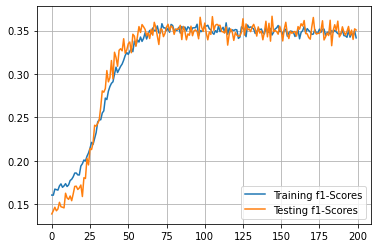

In [36]:
plt.plot(train_f1_scores, label='Training f1-Scores')
plt.plot(test_f1_scores, label='Testing f1-Scores')
plt.legend()
plt.grid()

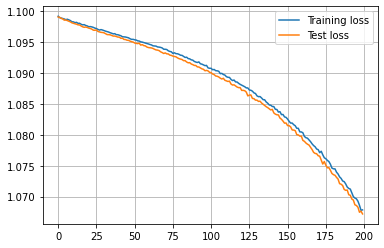

In [37]:
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Test loss')
plt.legend()
plt.grid()

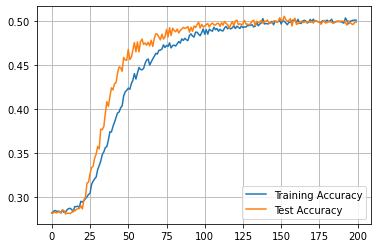

In [38]:
plt.plot(accuracy_total_train, label='Training Accuracy')
plt.plot(accuracy_total_val, label='Test Accuracy')
plt.legend()
plt.grid()

In [41]:
#Evaluation
classes = ['Loss','Draw','Win']
predict_list = []
y_pred = model(Player_Home_Test, Player_Away_Test)

for i, p in enumerate(y_pred):
    y_pred = torch.max(p.data, 0)[1]
    predict_list.append(y_pred)
stacked_tensor = torch.stack(predict_list)
y_test = y_test.cpu()

In [42]:
print(classification_report(y_test, stacked_tensor, target_names=classes))

              precision    recall  f1-score   support

        Loss       0.43      0.59      0.50      1189
        Draw       0.28      0.08      0.12      1102
         Win       0.58      0.68      0.63      1959

    accuracy                           0.50      4250
   macro avg       0.43      0.45      0.42      4250
weighted avg       0.46      0.50      0.46      4250



Text(0.5, 15.0, 'Predicted label')

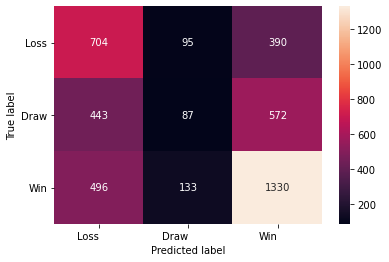

In [43]:
cm = confusion_matrix(y_test, stacked_tensor)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [45]:
correct = 0
total = 0

with torch.no_grad():
    for i, (x1, x2, y) in enumerate(test_loader):
        outputs = model(x1,x2)
        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print('Accuracy of the network on the 4250 matches: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 4250 matches: 49 %
